In [1]:
import requests

all_products = []

for page in range(1, 121):
    url = f"https://world.openfoodfacts.org/api/v2/search?categories=chocolates&fields=code,product_name,brands,nutriments&page_size=100&page={page}"

    try:
        response = requests.get(url, timeout=20)

        if response.status_code != 200:
            print(f" Page {page} failed")
            break

        if not response.text.strip():
            print(f" Page {page} empty response")
            break

        data = response.json()

        all_products.extend(data.get("products", []))
        print(f" Page {page} done, total products: {len(all_products)}")

    except Exception as e:
        print(f" Error on page {page}: {e}")
        break


 Page 1 done, total products: 100
 Page 2 done, total products: 200
 Page 3 done, total products: 300
 Page 4 done, total products: 400
 Page 5 done, total products: 500
 Page 6 done, total products: 600
 Page 7 done, total products: 700
 Page 8 done, total products: 800
 Page 9 done, total products: 900
 Page 10 done, total products: 1000
 Page 11 done, total products: 1100
 Page 12 done, total products: 1200
 Page 13 done, total products: 1300
 Page 14 done, total products: 1400
 Page 15 done, total products: 1499
 Page 16 done, total products: 1599
 Page 17 done, total products: 1699
 Page 18 done, total products: 1799
 Page 19 done, total products: 1899
 Page 20 done, total products: 1999
 Page 21 done, total products: 2099
 Page 22 done, total products: 2199
 Page 23 done, total products: 2299
 Page 24 done, total products: 2399
 Page 25 done, total products: 2499
 Page 26 done, total products: 2599
 Page 27 done, total products: 2699
 Page 28 done, total products: 2799
 Page 29 d

In [2]:
print(len(all_products))

11996


In [3]:
data.keys()

dict_keys(['count', 'page', 'page_count', 'page_size', 'products', 'skip'])

In [4]:
data['products']

[{'brands': 'Trek',
  'code': '5060088709047',
  'nutriments': {'carbohydrates': 23,
   'carbohydrates_100g': 46,
   'carbohydrates_serving': 23,
   'carbohydrates_unit': 'g',
   'carbohydrates_value': 23,
   'energy': 937,
   'energy-kcal': 224,
   'energy-kcal_100g': 448,
   'energy-kcal_serving': 224,
   'energy-kcal_unit': 'kcal',
   'energy-kcal_value': 224,
   'energy-kcal_value_computed': 223.8,
   'energy_100g': 1870,
   'energy_serving': 937,
   'energy_unit': 'kcal',
   'energy_value': 224,
   'fat': 10,
   'fat_100g': 20,
   'fat_serving': 10,
   'fat_unit': 'g',
   'fat_value': 10,
   'fiber': 1.9,
   'fiber_100g': 3.8,
   'fiber_serving': 1.9,
   'fiber_unit': 'g',
   'fiber_value': 1.9,
   'fruits-vegetables-legumes-estimate-from-ingredients_100g': 0,
   'fruits-vegetables-legumes-estimate-from-ingredients_serving': 0,
   'fruits-vegetables-nuts-estimate-from-ingredients_100g': 2.5,
   'fruits-vegetables-nuts-estimate-from-ingredients_serving': 2.5,
   'manganese': 0.0004

In [5]:

import pandas as pd

df = pd.DataFrame(data['products'])

df

,brands,code,nutriments,product_name
0,Trek,5060088709047,"{'carbohydrates': 23, 'carbohydrates_100g': 46...",Protein Flapjack
1,Bramwells,4088600247649,"{'carbohydrates': 25, 'carbohydrates_100g': 25...",Sweet Pickle
2,Florida Crystals,0075779311145,"{'carbohydrates': 64.285714285714, 'carbohydra...",Organic Raw Cane Sugar
3,Batchelors,5000175409122,"{'carbohydrates': 6.3, 'carbohydrates_100g': 6...",minestrone with croutons
4,Walkers,5000328202389,"{'carbohydrates': 46, 'carbohydrates_100g': 46...",Wortsits Giants Really cheesy
...,...,...,...,...
95,Martínez Somalo,8422229110308,"{'carbohydrates': 1, 'carbohydrates_100g': 1, ...",Chorizo Riojano
96,Asda,5054781841197,"{'carbohydrates': 35, 'carbohydrates_100g': 35...",Peruvian Dark Chocolate
97,Cucina,4088600338620,"{'carbohydrates': 3.8, 'carbohydrates_100g': 3...",Tomato passata
98,"Rügenwalder,Rügenwalder Mühle",4000405002377,"{'alcohol_modifier': '-', 'carbohydrates': 8.9...",Vegane Pommersche Apfel und Zwieben


In [6]:
df['nutriments'] 

0     {'carbohydrates': 23, 'carbohydrates_100g': 46...
1     {'carbohydrates': 25, 'carbohydrates_100g': 25...
2     {'carbohydrates': 64.285714285714, 'carbohydra...
3     {'carbohydrates': 6.3, 'carbohydrates_100g': 6...
4     {'carbohydrates': 46, 'carbohydrates_100g': 46...
                            ...                        
95    {'carbohydrates': 1, 'carbohydrates_100g': 1, ...
96    {'carbohydrates': 35, 'carbohydrates_100g': 35...
97    {'carbohydrates': 3.8, 'carbohydrates_100g': 3...
98    {'alcohol_modifier': '-', 'carbohydrates': 8.9...
99    {'carbohydrates': 6.5, 'carbohydrates_100g': 6...
Name: nutriments, Length: 100, dtype: object

In [8]:
#  expand the nested 'nutriments' column into separate columns and convert key columns to numeric
import pandas as pd

# use the full fetched list if available.
if 'all_products' in globals():
    df = pd.DataFrame(all_products)
else:
    df = pd.DataFrame(data['products'])

# Normalize nutriments (handles missing entries)
nutr_df = pd.json_normalize(df.get('nutriments', pd.Series([]))).rename(columns=lambda c: c.replace('.', '_'))


In [9]:
# concat and drop original nested column
df = pd.concat([df.reset_index(drop=True), nutr_df.reset_index(drop=True)], axis=1)
if 'nutriments' in df.columns:
    df = df.drop(columns=['nutriments'])

In [10]:
# Convert expected numeric nutriment columns to numeric types 
numeric_cols = [
    'energy-kcal_value','energy-kj_value','carbohydrates_value','sugars_value',
    'fat_value','saturated-fat_value','proteins_value','fiber_value',
    'salt_value','sodium_value','fruits-vegetables-nuts-estimate-from-ingredients_100g',
    'nutrition-score-fr','nova-group'
]

In [11]:
# try both raw names and with 'nutriments_' prefix produced by json_normalize
numeric_variants = set(numeric_cols + [f"nutriments_{c}" for c in numeric_cols])

for col in list(df.columns):
    if col in numeric_variants:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [12]:
# quick sanity check
print("Shape:", df.shape)
print("Numeric columns converted (sample):", [c for c in df.columns if c in numeric_variants][:10])

Shape: (11996, 1420)
Numeric columns converted (sample): ['carbohydrates_value', 'energy-kcal_value', 'energy-kj_value', 'fat_value', 'fiber_value', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'nutrition-score-fr', 'proteins_value', 'salt_value', 'saturated-fat_value']


In [13]:
# save intermediate for next steps
df.to_parquet("chocofacts_step_expanded.parquet", index=False)

In [14]:
# Step 3 — Feature Engineering
import pandas as pd

# Load previous cleaned data
df = pd.read_parquet("chocofacts_step_expanded.parquet")

In [15]:
# 1 Sugar to Carbohydrate Ratio ---
df["sugar_to_carb_ratio"] = df.apply(
    lambda r: (r["sugars_value"] / r["carbohydrates_value"])
    if pd.notna(r.get("sugars_value")) and pd.notna(r.get("carbohydrates_value")) and r["carbohydrates_value"] > 0
    else None,
    axis=1
)

# 2 Calorie Category (based on energy per 100g)
def calorie_category(kcal):
    if pd.isna(kcal):
        return "Unknown"
    if kcal < 250:
        return "Low Calorie"
    elif kcal < 450:
        return "Moderate Calorie"
    else:
        return "High Calorie"

df["calorie_category"] = df["energy-kcal_value"].apply(calorie_category)

# 3 Sugar Category ---
def sugar_category(sugar):
    if pd.isna(sugar):
        return "Unknown"
    if sugar < 10:
        return "Low Sugar"
    elif sugar < 30:
        return "Moderate Sugar"
    else:
        return "High Sugar"

df["sugar_category"] = df["sugars_value"].apply(sugar_category)

# 4 Ultra Processed (based on NOVA group) ---
df["is_ultra_processed"] = df["nova-group"].apply(
    lambda x: "Yes" if x == 4 else ("No" if pd.notna(x) else "Unknown")
)


In [16]:

#  Save the feature engineered data 
df.to_parquet("chocofacts_features.parquet", index=False)
print("Feature Engineering done!")
print("New columns added: ['sugar_to_carb_ratio', 'calorie_category', 'sugar_category', 'is_ultra_processed']")

Feature Engineering done!
New columns added: ['sugar_to_carb_ratio', 'calorie_category', 'sugar_category', 'is_ultra_processed']


In [17]:
# mysql connection
import pymysql
import pandas as pd
conn = pymysql.connect(
    host='127.0.0.1',  # localhost
    user='root',       
    password='',       
      
    port=3306
)

print("Connected successfully!")


Connected successfully!


In [18]:
#creating cursor
my_cursor=conn.cursor()

In [19]:
print(my_cursor)


In [20]:
#createing database
my_cursor.execute("CREATE DATABASE IF NOT EXISTS choco_crunch")
# %%
conn=pymysql.connect(
        host ="localhost",
        user="root",
        password="",
        database="choco_crunch"
    )

In [21]:
my_cursor=conn.cursor()
# %%
# table1 creation
my_cursor = conn.cursor()
my_cursor.execute("USE choco_crunch;")
my_cursor.execute("""
CREATE TABLE IF NOT EXISTS product_info (
    code VARCHAR(50) PRIMARY KEY,
    product_name TEXT,
    brands TEXT
)
""")

0

In [22]:
#table 2 creation
my_cursor.execute("""
CREATE TABLE IF NOT EXISTS nutrient_info(
       code VARCHAR(50) PRIMARY KEY,
    energy_kcal FLOAT,
    energy_kj FLOAT,
    carbohydrates FLOAT,
    sugars FLOAT,
    fat FLOAT,
    saturated_fat FLOAT,
    proteins FLOAT,
    fiber FLOAT,
    salt FLOAT,
    sodium FLOAT,
    nova_group INT,
    nutrition_score_fr INT,
    fruits_veg_nuts_estimate FLOAT,
    FOREIGN KEY (code) REFERENCES product_info(code)            )
                  """)

0

In [23]:
# %% table 3 creation
my_cursor.execute("""
    CREATE TABLE IF NOT EXISTS derived_metrics (
    code VARCHAR(50) PRIMARY KEY,
    sugar_to_carb_ratio FLOAT,
    calorie_category VARCHAR(50),
    sugar_category VARCHAR(50),
    is_ultra_processed VARCHAR(10),
    FOREIGN KEY (code) REFERENCES product_info(code)
)""")



0

In [24]:
import pandas as pd
import pymysql

# Load the final DataFrame with all features

df = pd.read_parquet("chocofacts_features.parquet")

# Establish connection to the MySQL database
conn = pymysql.connect(
    host="localhost",
    user="root",
    
    password="", 
    database="choco_crunch"
)
my_cursor = conn.cursor()
print("Successfully connected to the 'choco_crunch' database.")

# Loop and Insert Data into Three Tables 
insert_count = 0
for _, row in df.iterrows():
    # Retrieve and clean the primary key (code)
    code = str(row.get("code", "")).strip()
    if not code:
        continue  # for skiping rows without a valid product code

    try:
        # 1. Insert into product_info ---
        product_sql = """
        INSERT INTO product_info (code, product_name, brands)
        VALUES (%s, %s, %s)
        ON DUPLICATE KEY UPDATE product_name=VALUES(product_name), brands=VALUES(brands);
        """
        # Convert NaN values to Python None for SQL
        product_name = row.get("product_name") if pd.notna(row.get("product_name")) else None
        brands = row.get("brands") if pd.notna(row.get("brands")) else None
        my_cursor.execute(product_sql, (code, product_name, brands))

        # 2. Insert into nutrient_info ---
        nutrient_sql = """
        INSERT INTO nutrient_info (code, energy_kcal, energy_kj, carbohydrates, sugars, fat, saturated_fat, proteins, fiber, salt, sodium, nova_group, nutrition_score_fr, fruits_veg_nuts_estimate)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ON DUPLICATE KEY UPDATE energy_kcal=VALUES(energy_kcal), sugars=VALUES(sugars);
        """
        # Collect values using the exact column names from the data preparation step
        nutrients = [
            row.get('energy-kcal_value'), row.get('energy-kj_value'), row.get('carbohydrates_value'),
            row.get('sugars_value'), row.get('fat_value'), row.get('saturated-fat_value'),
            row.get('proteins_value'), row.get('fiber_value'), row.get('salt_value'),
            row.get('sodium_value'), row.get('nova-group'), row.get('nutrition-score-fr'),
            row.get('fruits-vegetables-nuts-estimate-from-ingredients_100g')
        ]
        # Replace pandas NaN/NaT with Python's None for SQL compatibility
        nutrients_safe = [None if pd.isna(val) else val for val in nutrients]
        my_cursor.execute(nutrient_sql, (code, *nutrients_safe))

        #  3. Insert into derived_metrics 
        derived_sql = """
        INSERT INTO derived_metrics (code, sugar_to_carb_ratio, calorie_category, sugar_category, is_ultra_processed)
        VALUES (%s, %s, %s, %s, %s)
        ON DUPLICATE KEY UPDATE calorie_category=VALUES(calorie_category), sugar_category=VALUES(sugar_category);
        """
        derived_metrics = [
            row.get('sugar_to_carb_ratio'), row.get('calorie_category'),
            row.get('sugar_category'), row.get('is_ultra_processed')
        ]
        derived_safe = [None if pd.isna(val) else val for val in derived_metrics]
        my_cursor.execute(derived_sql, (code, *derived_safe))

        insert_count += 1
    except pymysql.Error as e:
        print(f"Skipping row with code {code} due to error: {e}")

# Commit all changes to the database
conn.commit()
print(f"Data insertion complete. Total rows processed: {insert_count}")

# Verification Queries 
my_cursor.execute("SELECT COUNT(*) FROM product_info;")
print(f"Total records in 'product_info': {my_cursor.fetchone()[0]}")

my_cursor.execute("SELECT COUNT(*) FROM nutrient_info;")
print(f"Total records in 'nutrient_info': {my_cursor.fetchone()[0]}")
my_cursor.execute("SELECT COUNT(*) FROM derived_metrics;")
print(f"Total records in 'derived_metrics': {my_cursor.fetchone()[0]}")


Successfully connected to the 'choco_crunch' database.
Data insertion complete. Total rows processed: 11996
Total records in 'product_info': 11711
Total records in 'nutrient_info': 11711
Total records in 'derived_metrics': 11711


In [25]:

# 1 Count products per brand (show 'Unknown' where brand missing)
my_cursor.execute("""
SELECT 
    CASE 
        WHEN brands IS NULL OR brands = '' THEN 'Unknown Brand' 
        ELSE brands 
    END AS brand_name,
    COUNT(*) AS product_count
FROM product_info
GROUP BY brand_name
ORDER BY product_count DESC;
""")
results = my_cursor.fetchall()
for row in results:
    print(row)

('Unknown Brand', 573)
('Hacendado', 383)
('Tesco', 259)
('Carrefour', 143)
('Nestlé', 102)
('Heinz', 101)
('Bjorg', 101)
('LIDL', 97)
("Sainsbury's", 86)
('Danone', 80)
('Jaouda', 75)
('Bonne Maman', 74)
('Milbona', 73)
('Gerblé', 72)
('Fleury Michon', 68)
('Alpro', 66)
("Kellogg's", 65)
('ALDI', 61)
('Gullón', 58)
('Coca-Cola', 55)
('CHERGUI', 55)
('Carrefour BIO, Carrefour', 53)
('U', 51)
('Céréal Bio', 51)
('LU', 50)
('Alesto', 43)
('Excelo', 41)
('Bio Village, Marque Repère', 41)
('Crownfield', 40)
('Picard', 39)
('star', 39)
('ASDA', 38)
('Barilla', 36)
('Lindt', 35)
('Panzani', 35)
('Innocent', 35)
('Président', 34)
('Liebig', 33)
("By Sainsbury's", 32)
('Harrys', 32)
('Amora', 32)
('Yoplait', 32)
('Jordans', 32)
('Marks & Spencer', 31)
('Nature Valley', 31)
('Ferrero', 31)
('andros', 31)
('Bonduelle', 31)
('Warburtons', 31)
('Freshona', 30)
('Ethiquable', 30)
('Vemondo', 29)
('Sondey', 28)
('Knorr', 28)
('Walkers', 27)
('Milka', 27)
('La boulangère', 27)
('Yeo Valley', 27)
('Pr

In [26]:
# 2. Count unique products per brand 
my_cursor.execute("""
SELECT 
    CASE 
        WHEN brands IS NULL OR brands = '' THEN 'Unknown Brand' 
        ELSE brands 
    END AS brand_name,
    COUNT(DISTINCT code) AS unique_products
FROM product_info
GROUP BY brand_name
ORDER BY unique_products DESC;
""")
results = my_cursor.fetchall()
for row in results:
    print(row)


('Unknown Brand', 573)
('Hacendado', 383)
('Tesco', 259)
('Carrefour', 143)
('Nestlé', 102)
('Bjorg', 101)
('HEINZ', 101)
('LIDL', 97)
("Sainsbury's", 86)
('Danone', 80)
('Jaouda', 75)
('Bonne Maman', 74)
('Milbona', 73)
('Gerblé', 72)
('Fleury Michon', 68)
('Alpro', 66)
("Kellogg's", 65)
('ALDI', 61)
('Gullón', 58)
('CHERGUI', 55)
('Coca-Cola', 55)
('Carrefour BIO, Carrefour', 53)
('Céréal Bio', 51)
('U', 51)
('Lu', 50)
('Alesto', 43)
('Bio Village, Marque Repère', 41)
('Excelo', 41)
('Crownfield', 40)
('Picard', 39)
('star', 39)
('ASDA', 38)
('Barilla', 36)
('Innocent', 35)
('Lindt', 35)
('Panzani', 35)
('Président', 34)
('Liebig', 33)
('Amora', 32)
("By Sainsbury's", 32)
('Harrys', 32)
('Jordans', 32)
('Yoplait', 32)
('andros', 31)
('Bonduelle', 31)
('Ferrero', 31)
('Marks & Spencer', 31)
('Nature Valley', 31)
('Warburtons', 31)
('Ethiquable', 30)
('Freshona', 30)
('Vemondo', 29)
('Knorr', 28)
('Sondey', 28)
('La boulangère', 27)
('Milka', 27)
('Pringles', 27)
('Walkers', 27)
('Yeo 

In [27]:
# 3. Top 5 brands by product count 
my_cursor.execute("""
SELECT 
    CASE 
        WHEN brands IS NULL OR brands = '' THEN 'Unknown Brand'
        ELSE brands
    END AS brand_name,
    COUNT(*) AS total_products
FROM product_info
GROUP BY brand_name
ORDER BY total_products DESC
LIMIT 5;
""")

results = my_cursor.fetchall()
for row in results:
    print(row)


('Unknown Brand', 573)
('Hacendado', 383)
('Tesco', 259)
('Carrefour', 143)
('Nestlé', 102)


In [28]:
# 4. Products with missing product name
my_cursor.execute("""
SELECT 
    code, 
    CASE 
        WHEN brands IS NULL OR brands = '' THEN 'Unknown Brand'
        ELSE brands
    END AS brand_name
FROM product_info
WHERE product_name IS NULL OR product_name = '';
""")

results = my_cursor.fetchall()
for row in results:
    print(row)

('0000200003087', 'Walkers')
('0012970422003', 'Nutella')
('00168069', 'Marks & Spencer')
('0016843698748', 'Dakota')
('0040600029759', 'Lindt')
('0044490063114', 'LU')
('0100035000430', 'Unknown Brand')
('0111121211111', 'Unknown Brand')
('0121201800111', 'Safia')
('01230739', 'Unknown Brand')
('0125484000213', 'Unknown Brand')
('01415490', 'Hacendado')
('0144432001003', 'Unknown Brand')
('0144435000430', 'Unknown Brand')
('0144435502828', 'Unknown Brand')
('0144528000163', 'Unknown Brand')
('0152103001467', 'Unknown Brand')
('0152152421568', 'Unknown Brand')
('0154480000231', 'Unknown Brand')
('0402004014227', 'Unknown Brand')
('0633148100013', 'Tajín')
('0664400948258', 'Unknown Brand')
('0745760392988', 'Unknown Brand')
('0764460733532', 'Unknown Brand')
('0769503567112', 'Unknown Brand')
('0769503575469', 'Marsa')
('0796554056180', 'Unknown Brand')
('10022708', 'Dreistern, S.Pellegrino')
('10023594', 'Suzi Wan')
('10232903', 'Unknown Brand')
('11217770', 'Hacendado')
('12301218', 

In [29]:
# 5. Number of unique brands
my_cursor.execute("""
SELECT COUNT(DISTINCT 
    CASE 
        WHEN brands IS NULL OR brands = '' THEN NULL
        ELSE brands
    END
) AS total_unique_brands
FROM product_info;
""")

results = my_cursor.fetchall()
for row in results:
    print("Total unique brands:", row[0])

Total unique brands: 3370


In [30]:
# 6. Products with code starting with '3'
my_cursor.execute("""
SELECT 
    code, 
    CASE 
        WHEN product_name IS NULL OR product_name = '' THEN 'Unknown Product'
        ELSE product_name
    END AS product_name,
    CASE 
        WHEN brands IS NULL OR brands = '' THEN 'Unknown Brand'
        ELSE brands
    END AS brand_name
FROM product_info
WHERE code LIKE '3%';
""")

results = my_cursor.fetchall()
for row in results:
    print(row)

('30004825', 'Unknown Product', 'Unknown Brand')
('30005501', 'Société crème', 'Société')
('3011360000767', 'Knorr Assaisonnement En Poudre Aromat Tube 70g', 'Knorr')
('3011360002884', "Secret d'arômes plein sud", 'Knorr')
('3011360004420', 'Levure de boulanger Briochin', 'Alsa')
('3011360006301', 'Knorr Soupe Déshydratée Passée aux 9 Légumes 4 Portions', 'Knorr')
('3011360007421', "Knorr Soupe Minestrone à l'Huile d'Olive 104g 4 Portions", 'Knorr, Unilever')
('3011360007438', 'Soupe Saveur Poule au Pot', 'Knorr®, Unilever®')
('3011360020017', 'Knorr Soupe Déshydratée Poule aux Vermicelles 4 Portions', 'Knorr®, Unilever®')
('3011360023995', 'Knorr Soupe Déshydratée Douceur de 9 Légumes 3 Portions', 'DouceurⓇ, Knorr®')
('3011360030108', 'Sucre Vanillé des Isles', 'Alsa')
('3011360030474', 'Mayonnaise classique', 'Lesieur')
('3011360030498', "Mayonnaise Classique à l'huile de colza", 'Lesieur')
('3011360031914', 'Bouillon de Poule', 'Knorr')
('3011360083302', "Knorr Soupe Déshydratée Dou

In [31]:
# 7. Top 10 products with highest calories
my_cursor.execute("""
SELECT 
    p.product_name,
    CASE 
        WHEN p.brands IS NULL OR p.brands = '' THEN 'Unknown Brand'
        ELSE p.brands
    END AS brand_name,
    n.energy_kcal
FROM nutrient_info n
JOIN product_info p ON n.code = p.code
WHERE n.energy_kcal IS NOT NULL
ORDER BY n.energy_kcal DESC
LIMIT 10;
""")

results = my_cursor.fetchall()
for row in results:
    print(row)

('Semillas de chía', 'Hacendado', 45793.5)
('Pizzarella premium', 'Gastro mixte', 5280.0)
("Sirop d'Agave", 'Sunny Via', 1600.0)
('penaut butter creamy', 'Alaska', 904.0)
('Kokosnussöl', "VitaD'or", 900.0)
("Huile d'Olive Vierge Extra", 'Puget', 900.0)
("Huile d'olive", 'Puget', 900.0)
('Coconut oil', 'Bumble bee foods', 900.0)
('Olej rzepakowy z pierwszego tłoczenia, filtrowany', 'Kujawski', 900.0)
('Huile de tournesol', 'Lesieur Cristal', 900.0)


In [32]:
# 8. Average sugar per NOVA group
my_cursor.execute("""
SELECT 
    nova_group,
    ROUND(AVG(sugars), 2) AS avg_sugar
FROM nutrient_info
WHERE sugars IS NOT NULL
GROUP BY nova_group
ORDER BY nova_group;
""")

results = my_cursor.fetchall()
for row in results:
    print("NOVA Group:", row[0], "| Average Sugar:", row[1])

NOVA Group: None | Average Sugar: 12.19
NOVA Group: 1 | Average Sugar: 6.07
NOVA Group: 2 | Average Sugar: 18.92
NOVA Group: 3 | Average Sugar: 7.04
NOVA Group: 4 | Average Sugar: 13.61


In [33]:
# 9. Count products with fat_value > 20g
my_cursor.execute("""
SELECT COUNT(*) AS high_fat_products
FROM nutrient_info
WHERE fat > 20;
""")

results = my_cursor.fetchall()
for row in results:
    print("High-fat products:", row[0])


High-fat products: 2870


In [34]:
# 10. Average carbohydrates of all chocolates
my_cursor.execute("""
SELECT ROUND(AVG(carbohydrates), 2) AS avg_carbohydrates
FROM nutrient_info
WHERE carbohydrates IS NOT NULL;
""")

results = my_cursor.fetchall()
for row in results:
    print("Average carbohydrates (g/100g):", row[0])


Average carbohydrates (g/100g): 29.3


In [35]:
# 11. Products with sodium_value > 1g
my_cursor.execute("""
SELECT 
    p.product_name,
    CASE 
        WHEN p.brands IS NULL OR p.brands = '' THEN 'Unknown Brand'
        ELSE p.brands
    END AS brand_name,
    n.sodium
FROM nutrient_info n
JOIN product_info p ON n.code = p.code
WHERE n.sodium > 1;
""")

results = my_cursor.fetchall()
for row in results:
    print(row)


('Sriracha Sauce🙂', 'TABASCO', 2.68)
('', 'Nutella', 42.8)
('Thin-Sliced Organic Bread 21 Whole Grains and Seeds', "Dave's Killer Bread", 105.0)
('Original Cheerios', 'Cheerios,General Mills', 190.0)
('Sriracha', 'Uni-Eagle', 2.04)
('kefir plain', 'Lifeway', 52.1)
('Beef Lasagne', 'Marks & Spencer', 1.023)
('SRIRACHA CHILI SAUCE', 'HUY FONG FOODS, INC.', 1.5)
('Tortilla Chips', 'Doritos', 170.0)
('Dijon mustard', "Sainsbury's", 2.41)
('Lightly Salted Rice Cakes', 'Quaker', 15.0)
('Red Hot Wings Buffalo Sauce', 'Frank’s', 2.312)
('Ramen Noodle Soup', 'Maruchan', 1.52)
('Mae ploy Red curry paste 400g', 'Mae Ploy', 5.586)
('guacamole', 'Old El Paso', 6.98)
('Cheese Oatcakes', "nairn's", 1.12)
('Smooth', 'Kraft', 65.0)
('Premium dark soy sauce', 'Lee Kum Kee', 7.72)
('Premium Soy Sauce', 'Lee Kum Kee', 6.768)
('Kee Chiu Chow Chilli Oil', 'Lee Kum Kee', 2.714)
('Super Nutty Wholefood', 'M&S,Marks & Spencer', 500.0)
('indoumi goût poulet', 'Indomie', 1.288)
('Fried Noodles', 'Indomie', 1.04)

In [36]:
# 12. Products containing fruits/vegetables/nuts
my_cursor.execute("""
SELECT COUNT(*) AS products_with_fvn
FROM nutrient_info
WHERE fruits_veg_nuts_estimate > 0;
""")

results = my_cursor.fetchall()
for row in results:
    print("Products with fruits/vegetables/nuts:", row[0])

Products with fruits/vegetables/nuts: 5706


In [37]:
# 13. Products with energy-kcal_value > 500
my_cursor.execute("""
SELECT 
    p.product_name,
    CASE 
        WHEN p.brands IS NULL OR p.brands = '' THEN 'Unknown Brand'
        ELSE p.brands
    END AS brand_name,
    n.energy_kcal
FROM nutrient_info n
JOIN product_info p ON n.code = p.code
WHERE n.energy_kcal > 500;
""")
results = my_cursor.fetchall()
for row in results:
    print(row)

('', 'Walkers', 522.0)
('Shortbread All Butter Fingers', "Sainsbury's", 525.0)
('Ready Salted Crisps', 'Walkers', 518.0)
('Sunflower Oil', "Sainsbury's", 828.0)
('', 'Nutella', 539.0)
('Yankee', 'Unknown Brand', 571.42)
('Walnut pieces', "Sainsbury's", 699.0)
('Beef Lasagne', 'Marks & Spencer', 644.0)
('Bocconcini mozzarella & Sunblush cherry tomatoes', "Sainsbury's", 535.0)
('Salted English Butter', "Sainsbury's,by sainsbury's", 745.0)
('Lightly sea salted', "Sainsbury's", 505.0)
('penaut butter creamy', 'Alaska', 904.0)
('Peanut butter Creamy', 'Skippy', 593.0)
('Beurre de Cacahuètes Extra-Crunchy', 'Hormel Foods Corporation, Skippy', 603.0)
('Skippy Smooth Peanut Butter', 'Skippy', 631.0)
('Shortbread Highlanders', 'Walkers', 514.0)
('Shortbread Fingers', 'Walker’s', 533.0)
('Shortbread highlanders', 'walkers', 514.0)
('Ugandan dark chocolate', "Sainsburys,Sainsbury's", 648.0)
('80% Dark Chocolate', "Sainsbury's", 592.0)
('Single Estate Venezuelan Dark clChocolate', "Sainsbury's tas

In [38]:
# 14. Count products per calorie_category
my_cursor.execute("""
SELECT calorie_category, COUNT(*) AS total_products
FROM derived_metrics
GROUP BY calorie_category
ORDER BY total_products DESC;
""")
for row in my_cursor.fetchall():
    print(row)

('Low Calorie', 5622)
('Moderate Calorie', 2899)
('High Calorie', 2481)
('Unknown', 709)


In [39]:
# 15. Count of High Sugar products
my_cursor.execute("""
SELECT COUNT(*) AS high_sugar_products
FROM derived_metrics
WHERE sugar_category = 'High Sugar';
""")
print("High Sugar products:", my_cursor.fetchone()[0])

High Sugar products: 1336


In [40]:
# 16. Average sugar_to_carb_ratio for High Calorie products
my_cursor.execute("""
SELECT ROUND(AVG(sugar_to_carb_ratio), 3)
FROM derived_metrics
WHERE calorie_category = 'High Calorie';
""")
print("Average sugar_to_carb_ratio (High Calorie):", my_cursor.fetchone()[0])


Average sugar_to_carb_ratio (High Calorie): 0.546


In [41]:
# 17. Products that are both High Calorie and High Sugar
my_cursor.execute("""
SELECT p.product_name, p.brands
FROM derived_metrics d
JOIN product_info p ON d.code = p.code
WHERE d.calorie_category = 'High Calorie' AND d.sugar_category = 'High Sugar';
""")
for row in my_cursor.fetchall():
    print(row)

('', 'Nutella')
('Peruvian Dark Milk Chocolate', "Sainsbury's")
('Lindt Excellence', 'Lindt Excellence')
('Marylands Chocolate Chip Cookies', 'Burton Biscuits')
('single origin milk chocolate', 'Marks & Spencer')
('Cookies chocolat noir', 'Céliane')
('Chocolate and Hazelnut Cake', 'Shär Gluten-Free')
('Crousti’pause choco noisette', 'Gerblé')
('Chocolat noir pâtissier', 'Nestlé')
('Ginger Crystallized In Dark Chocolate', 'Chocolove')
('Double Trouble Chocolate Cookies', 'Wicked Kitchen')
('Dark chocolate covered pretzels with peppermint pieces, peppermint', 'Nestlé')
('Kafferep', 'IKEA')
(None, 'Excelo')
('Kafferep (Aveia)', 'Ikea')
('poulain', 'Poulain')
('1848 Chocolat en poudre', 'Poulain')
('', 'Choco Nussa,Lidl')
('Choco Duo', 'Mister Choc')
('Vajas keksz', 'Sondey')
('Nut & fruit mix classic', 'Alesto, Lidl')
('Whole Nut Milk Chocolate', 'Fin Carré')
('Edelrahm-Ganze-Mandel', 'Fin Carré')
('Chocolat Lait Noisettes entières', 'Bellarom, Fin Carre')
('Milk Chocolate', 'Fin Carré')


In [42]:
# 18. Number of ultra-processed products
my_cursor.execute("""
SELECT COUNT(*) AS ultra_processed_count
FROM derived_metrics
WHERE is_ultra_processed = 'Yes';
""")
print("Ultra-processed products:", my_cursor.fetchone()[0])

Ultra-processed products: 6189


In [43]:
# 19 Products with sugar_to_carb_ratio > 0.7
my_cursor.execute("""
SELECT p.product_name, p.brands, d.sugar_to_carb_ratio
FROM derived_metrics d
JOIN product_info p ON d.code = p.code
WHERE d.sugar_to_carb_ratio > 0.7;
""")
for row in my_cursor.fetchall():
    print(row)

('Greek Yoghurt', 'M&S', 0.928571)
('Sunflower Oil', "Sainsbury's", 1.0)
('Taste the Difference Raspberry Conserve', "Sainsbury's, Taste the difference", 0.971479)
('Strawberry Conserve', "Sainsbury's", 0.949097)
('SuperGreen Salad', 'Marks & Spencer', 0.906977)
('Hazelnut Spread with Cocoa', 'Nutella', 0.954545)
('Sriracha Sauce🙂', 'TABASCO', 0.703704)
('', 'Nutella', 0.97913)
('Tomato Ketchup', 'Heinz', 0.8)
('Tomato Ketchup', 'Heinz', 1.0)
('Natural yogurt', "Sainsbury's", 1.0)
('Coconut Milk', 'aroy-d, thai-agri-foods-public-company-limited', 1.0)
('Sriracha', 'Uni-Eagle', 0.927835)
('kefir plain', 'Lifeway', 1.0)
('Walnut pieces', "Sainsbury's", 0.787879)
('Fast Action Dried Yeast 8 Sachets', "Sainsbury's", 0.789773)
('Fresh whole milk', "Sainsbury's", 1.0)
('cream cheese', 'Philadelphia', 1.0)
("Crème de marrons de l'Ardèche", 'Clement Faugier', 0.789308)
('Crème de marrons', 'Clément Faugier', 0.789308)
('Cocktail de fruits au jus de raisin', 'Del Monte', 0.916667)
('Peach Slice

In [44]:
# 20 Average sugar_to_carb_ratio per calorie_category
my_cursor.execute("""
SELECT calorie_category, ROUND(AVG(sugar_to_carb_ratio), 3) AS avg_ratio
FROM derived_metrics
GROUP BY calorie_category
ORDER BY avg_ratio DESC;
""")
for row in my_cursor.fetchall():
    print(row)

('Unknown', 0.66)
('Low Calorie', 0.577)
('High Calorie', 0.546)
('Moderate Calorie', 0.359)


In [45]:
# 21. Top 5 brands with most High Calorie products
my_cursor.execute("""
SELECT p.brands, COUNT(*) AS high_calorie_count
FROM derived_metrics d
JOIN product_info p ON d.code = p.code
WHERE d.calorie_category = 'High Calorie'
GROUP BY p.brands
ORDER BY high_calorie_count DESC
LIMIT 5;
""")
for row in my_cursor.fetchall():
    print(row)

('Hacendado', 81)
(None, 65)
('Lindt', 33)
('Tesco', 31)
('Gullón', 29)


In [46]:
# 22. Average energy-kcal_value for each calorie_category
my_cursor.execute("""
SELECT d.calorie_category, ROUND(AVG(n.energy_kcal), 2) AS avg_calories
FROM derived_metrics d
JOIN nutrient_info n ON d.code = n.code
WHERE n.energy_kcal IS NOT NULL
GROUP BY d.calorie_category;
""")
for row in my_cursor.fetchall():
    print(row)

('High Calorie', 588.82)
('Low Calorie', 103.42)
('Moderate Calorie', 356.02)


In [47]:
# 23. Count of ultra-processed products per brand
my_cursor.execute("""
SELECT p.brands, COUNT(*) AS ultra_processed_count
FROM derived_metrics d
JOIN product_info p ON d.code = p.code
WHERE d.is_ultra_processed = 'Yes'
GROUP BY p.brands
ORDER BY ultra_processed_count DESC;
""")
for row in my_cursor.fetchall():
    print(row)

('Hacendado', 220)
(None, 109)
('Tesco', 87)
('Bonne Maman', 69)
('Gerblé', 66)
('Carrefour', 65)
('Alpro', 65)
('Nestlé', 64)
('Bjorg', 61)
('Fleury Michon', 58)
('Heinz', 57)
('Gullón', 53)
('Coca-Cola', 51)
('Lu', 48)
('Lidl', 41)
("Kellogg's", 38)
('Danone', 36)
('Milbona', 35)
('Harrys', 32)
('Nature Valley', 30)
('jaouda', 30)
("Sainsbury's", 29)
('Excelo', 29)
('Ferrero', 28)
('Lindt', 27)
('U', 27)
('La boulangère', 27)
('Warburtons', 27)
('', 26)
('Crownfield', 26)
('Jordans', 26)
('Pringles', 25)
('Sondey', 24)
('Knorr', 24)
('Aldi', 24)
('Amora', 23)
('Barilla', 23)
('Liebig', 22)
('Milka', 22)
('St michel', 21)
('Vemondo', 20)
('Panzani', 20)
('Haribo', 20)
('Picard', 20)
("Hellmann's", 19)
('Céréal Bio', 19)
('Nakd', 19)
('Schar', 18)
('Poulain', 18)
('Carrefour BIO, Carrefour', 18)
('andros', 18)
('CHERGUI', 18)
('Jacquet', 17)
('Bonduelle', 17)
('Yoplait', 17)
('Lucien Georgelin', 17)
('Cadbury', 17)
('Star', 17)
('Philadelphia', 16)
('Kinder', 16)
('Hovis', 16)
('Flora'

In [48]:
# 24. Products with High Sugar and High Calorie (with brand)
my_cursor.execute("""
SELECT p.product_name, p.brands, d.calorie_category, d.sugar_category
FROM derived_metrics d
JOIN product_info p ON d.code = p.code
WHERE d.calorie_category = 'High Calorie' AND d.sugar_category = 'High Sugar';
""")
for row in my_cursor.fetchall():
    print(row)

('', 'Nutella', 'High Calorie', 'High Sugar')
('Peruvian Dark Milk Chocolate', "Sainsbury's", 'High Calorie', 'High Sugar')
('Lindt Excellence', 'Lindt Excellence', 'High Calorie', 'High Sugar')
('Marylands Chocolate Chip Cookies', 'Burton Biscuits', 'High Calorie', 'High Sugar')
('single origin milk chocolate', 'Marks & Spencer', 'High Calorie', 'High Sugar')
('Cookies chocolat noir', 'Céliane', 'High Calorie', 'High Sugar')
('Chocolate and Hazelnut Cake', 'Shär Gluten-Free', 'High Calorie', 'High Sugar')
('Crousti’pause choco noisette', 'Gerblé', 'High Calorie', 'High Sugar')
('Chocolat noir pâtissier', 'Nestlé', 'High Calorie', 'High Sugar')
('Ginger Crystallized In Dark Chocolate', 'Chocolove', 'High Calorie', 'High Sugar')
('Double Trouble Chocolate Cookies', 'Wicked Kitchen', 'High Calorie', 'High Sugar')
('Dark chocolate covered pretzels with peppermint pieces, peppermint', 'Nestlé', 'High Calorie', 'High Sugar')
('Kafferep', 'IKEA', 'High Calorie', 'High Sugar')
(None, 'Excelo'

In [49]:
# 25. Average sugar content per brand for ultra-processed products
my_cursor.execute("""
SELECT p.brands, ROUND(AVG(n.sugars), 2) AS avg_sugar
FROM product_info p
JOIN nutrient_info n ON p.code = n.code
JOIN derived_metrics d ON p.code = d.code
WHERE d.is_ultra_processed = 'Yes'
GROUP BY p.brands
ORDER BY avg_sugar DESC
LIMIT 10;
""")
for row in my_cursor.fetchall():
    print(row)

('Saint Louis Sucre, Saint-Louis, Tutti free', 99.0)
('Vichy', 98.5)
('Ferrero,Mixte,TIC TAC', 94.5)
('tictac', 94.5)
('Ferrero, TIC TAC', 90.7)
('Canderel, Merisant', 90.0)
('Moulin de Valdonne', 81.5)
('La Maison Guiot', 80.95)
('Chocao', 79.5)
('Belbake', 79.0)


In [50]:
# 26. Number of products with fruits/vegetables/nuts per calorie_category
my_cursor.execute("""
SELECT d.calorie_category, COUNT(*) AS products_with_fvn
FROM nutrient_info n
JOIN derived_metrics d ON n.code = d.code
WHERE n.fruits_veg_nuts_estimate > 0
GROUP BY d.calorie_category;
""")
for row in my_cursor.fetchall():
    print(row)

('High Calorie', 1365)
('Low Calorie', 3075)
('Moderate Calorie', 1200)
('Unknown', 66)


In [51]:
# 27/ Top 5 products by sugar_to_carb_ratio with their calorie and sugar category
my_cursor.execute("""
SELECT p.product_name, p.brands, ROUND(d.sugar_to_carb_ratio, 3), d.calorie_category, d.sugar_category
FROM derived_metrics d
JOIN product_info p ON d.code = p.code
WHERE d.sugar_to_carb_ratio IS NOT NULL
ORDER BY d.sugar_to_carb_ratio DESC
LIMIT 5;
""")
for row in my_cursor.fetchall():
    print(row)

('Beurre Gastronomique Doux', '', 16.0, 'Low Calorie', 'Low Sugar')
('Beurre Doux Extrafin', 'Envia / Lidl', 10.0, 'High Calorie', 'Low Sugar')
('Sergio', 'excelo', 6.683, 'High Calorie', 'High Sugar')
(None, None, 5.0, 'Moderate Calorie', 'Low Sugar')
('El Baraka', 'vmm', 4.374, 'Low Calorie', 'High Sugar')


===== Numeric Columns Summary =====
       energy-kcal_value  energy-kj_value  carbohydrates_value  sugars_value  \
count       11271.000000      6359.000000         11271.000000  11124.000000   
mean          274.905880      1211.034744            29.288837     11.292935   
std           205.479159       851.960196            93.756739     17.076290   
min             0.000000         0.000000             0.000000      0.000000   
25%            91.000000       408.000000             4.665000      1.000000   
50%           241.000000      1170.000000            15.100000      4.000000   
75%           434.000000      1862.500000            55.000000     13.000000   
max          1000.000000      3768.000000          8989.000000    100.000000   

          fat_value  saturated-fat_value  proteins_value  fiber_value  \
count  11305.000000         11083.000000    11291.000000  8400.000000   
mean      14.874673             5.105262        7.269223     3.765891   
std       38.132200     

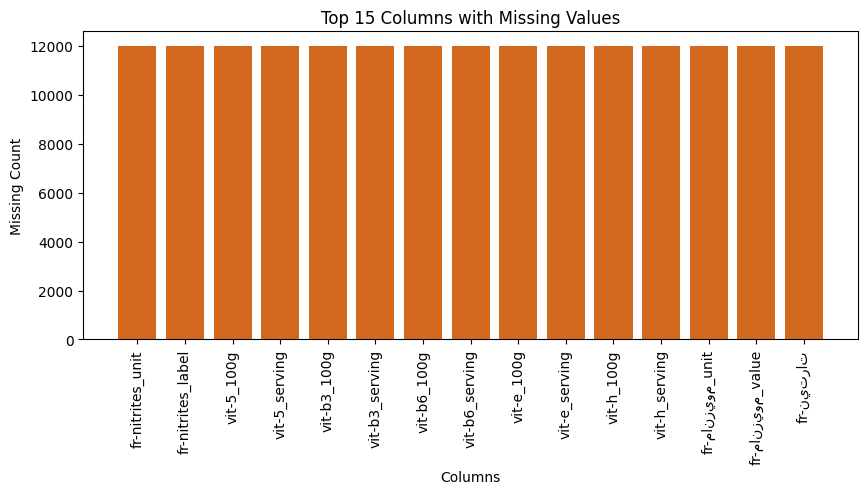

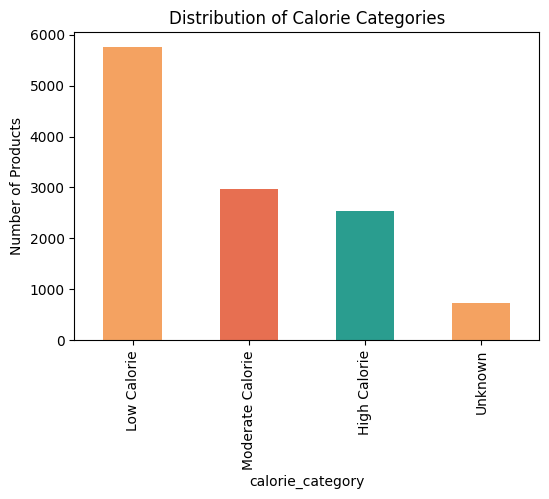

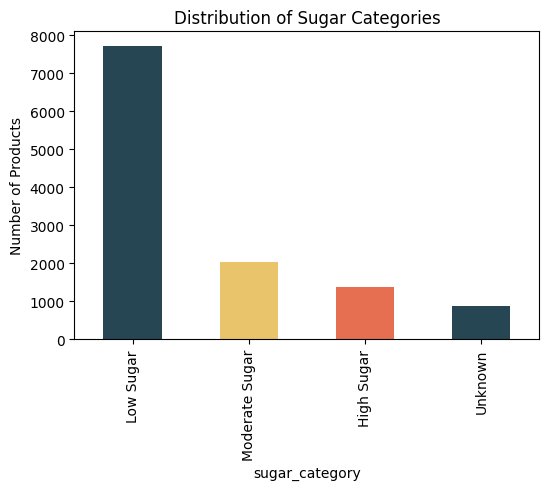

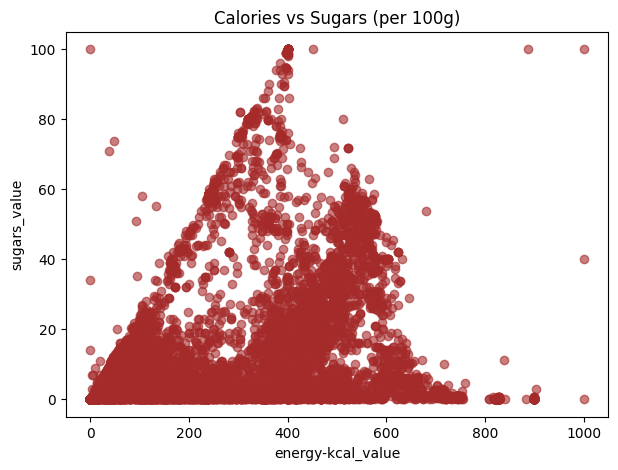

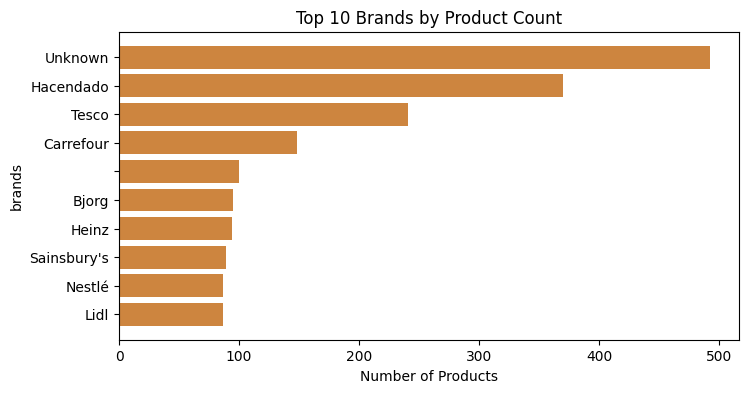

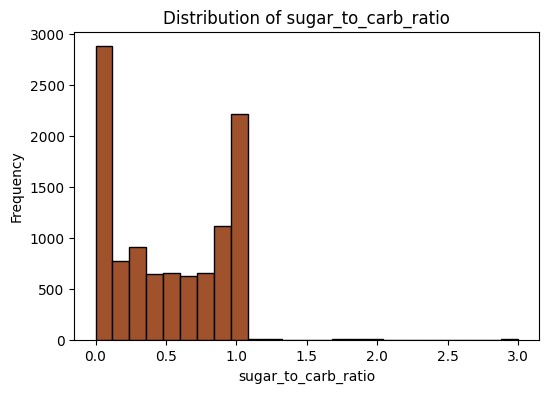

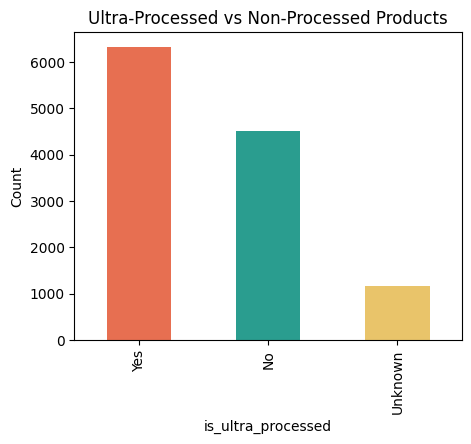

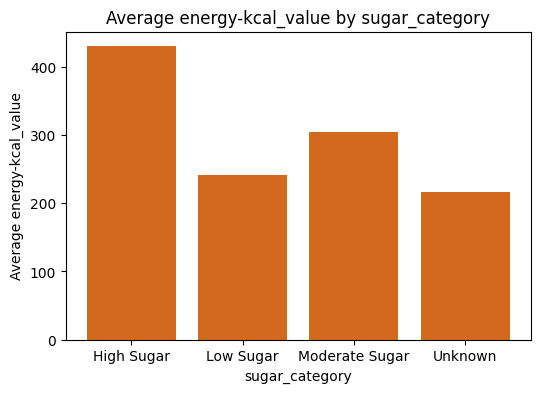

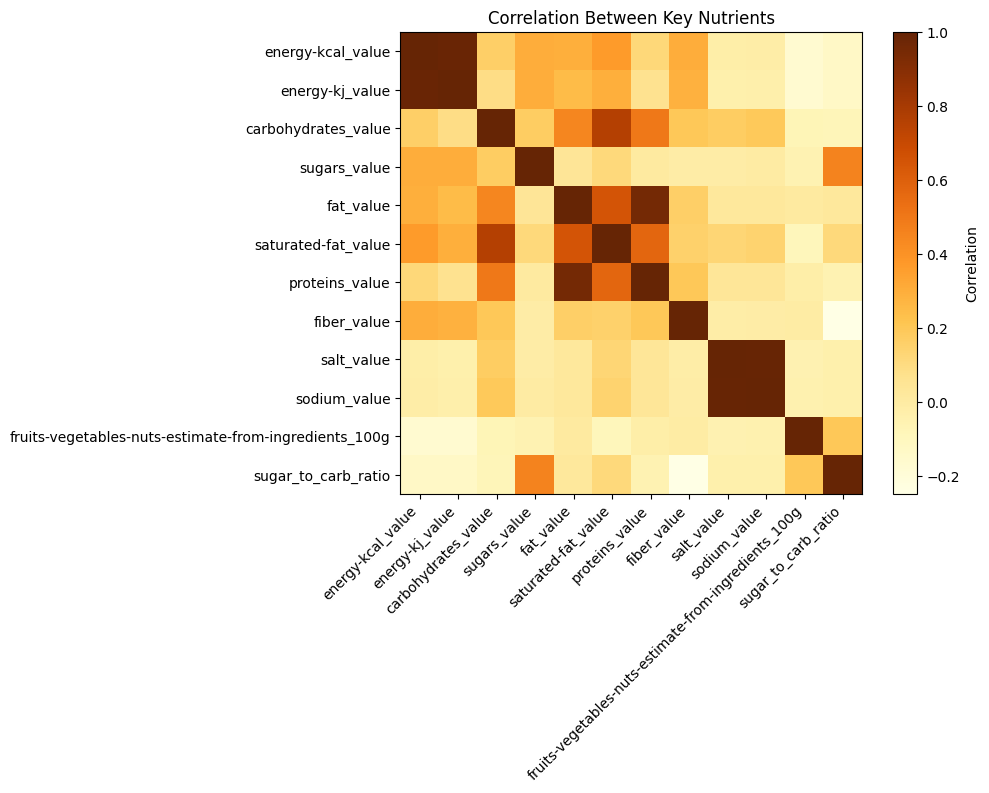

EDA completed successfully 


In [63]:
# Step 6 — Cleaned EDA for Professional Plots (NaN + Outlier Safe)

from matplotlib import pyplot as plt
import pandas as pd

# Load the feature-engineered dataset
df = pd.read_parquet("chocofacts_features.parquet")

#
# 1. Numeric Columns Summary 

numeric_cols = [
    "energy-kcal_value",
    "energy-kj_value",
    "carbohydrates_value",
    "sugars_value",
    "fat_value",
    "saturated-fat_value",
    "proteins_value",
    "fiber_value",
    "salt_value",
    "sodium_value",
    "fruits-vegetables-nuts-estimate-from-ingredients_100g",
    "sugar_to_carb_ratio"
]

# Clip extreme outliers for plotting
df_plot = df.copy()
df_plot["fiber_value"] = df_plot["fiber_value"].clip(upper=50)
df_plot["salt_value"] = df_plot["salt_value"].clip(upper=100)
df_plot["sodium_value"] = df_plot["sodium_value"].clip(upper=50)
df_plot["sugar_to_carb_ratio"] = df_plot["sugar_to_carb_ratio"].clip(upper=3)
df_plot["energy-kcal_value"] = df_plot["energy-kcal_value"].clip(upper=1000)
df_plot["sugars_value"] = df_plot["sugars_value"].clip(upper=100)

print("===== Numeric Columns Summary =====")
print(df_plot[numeric_cols].describe())

# 
# 2. Categorical Columns Summary
# 
categorical_cols = [
    "brands",
    "product_name",
    "calorie_category",
    "sugar_category",
    "is_ultra_processed"
]

print("\n Categorical Columns Summary ")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df_plot[col].value_counts(dropna=False).head(10))  # top 10 values


# 3. Missing Values Plot

missing = df_plot.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10,4))
plt.bar(missing.index[:15], missing.values[:15], color='chocolate')
plt.xticks(rotation=90)
plt.title("Top 15 Columns with Missing Values")
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.show()


# 4. Calorie Category Distribution

plt.figure(figsize=(6,4))
df_plot["calorie_category"].value_counts().plot(kind="bar", color=['#F4A261','#E76F51','#2A9D8F'])
plt.title("Distribution of Calorie Categories")
plt.xlabel("calorie_category")
plt.ylabel("Number of Products")
plt.show()


# 5. Sugar Category Distribution

plt.figure(figsize=(6,4))
df_plot["sugar_category"].value_counts().plot(kind="bar", color=['#264653','#E9C46A','#E76F51'])
plt.title("Distribution of Sugar Categories")
plt.xlabel("sugar_category")
plt.ylabel("Number of Products")
plt.show()

# 6. Calories vs Sugars

plot_df = df_plot.dropna(subset=["energy-kcal_value","sugars_value"])
plt.figure(figsize=(7,5))
plt.scatter(plot_df["energy-kcal_value"], plot_df["sugars_value"], alpha=0.6, color='brown')
plt.title("Calories vs Sugars (per 100g)")
plt.xlabel("energy-kcal_value")
plt.ylabel("sugars_value")
plt.show()


# 7. Top 10 Brands by Product Count

top_brands = df_plot["brands"].fillna("Unknown").value_counts().head(10)
plt.figure(figsize=(8,4))
plt.barh(top_brands.index[::-1], top_brands.values[::-1], color='peru')
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("brands")
plt.show()


# 8. Sugar-to-Carb Ratio Distribution

plt.figure(figsize=(6,4))
plt.hist(df_plot["sugar_to_carb_ratio"].dropna(), bins=25, color='sienna', edgecolor='black')
plt.title("Distribution of sugar_to_carb_ratio")
plt.xlabel("sugar_to_carb_ratio")
plt.ylabel("Frequency")
plt.show()


# 9. Ultra-Processed vs Non-Processed Products

plt.figure(figsize=(5,4))
df_plot["is_ultra_processed"].value_counts().plot(kind="bar", color=['#E76F51','#2A9D8F','#E9C46A'])
plt.title("Ultra-Processed vs Non-Processed Products")
plt.xlabel("is_ultra_processed")
plt.ylabel("Count")
plt.show()


# 10. Average Calories by Sugar Category

avg_cal = df_plot.dropna(subset=["energy-kcal_value"]).groupby("sugar_category")["energy-kcal_value"].mean()
plt.figure(figsize=(6,4))
plt.bar(avg_cal.index, avg_cal.values, color='chocolate')
plt.title("Average energy-kcal_value by sugar_category")
plt.xlabel("sugar_category")
plt.ylabel("Average energy-kcal_value")
plt.show()


# 11. Correlation Between Key Nutrients

corr = df_plot[numeric_cols].dropna().corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation="nearest", cmap="YlOrBr")
plt.colorbar(label="Correlation")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Between Key Nutrients")
plt.show()

print("EDA completed successfully ")
